In [1]:
import pandas as pd
df = pd.read_csv("drug.csv")
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


<Axes: >

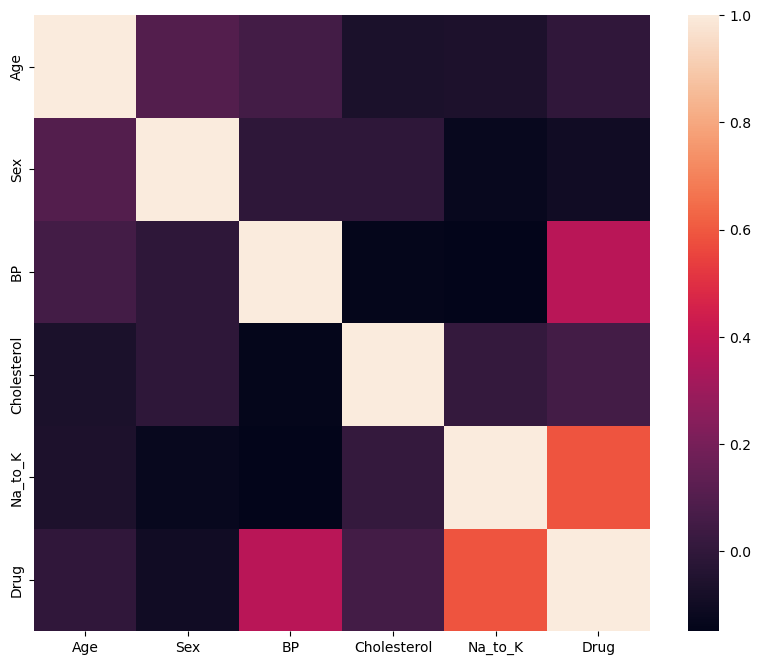

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, ax=plt.subplots(figsize=(10,8))
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

corr = df_encoded.corr()
sns.heatmap(corr, square=True, ax=ax)

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print("X Values")
print(x)
print("Y Values")
print(y)

X Values
     Age Sex      BP Cholesterol  Na_to_K
0     23   F    HIGH        HIGH   25.355
1     47   M     LOW        HIGH   13.093
2     47   M     LOW        HIGH   10.114
3     28   F  NORMAL        HIGH    7.798
4     61   F     LOW        HIGH   18.043
..   ...  ..     ...         ...      ...
195   56   F     LOW        HIGH   11.567
196   16   M     LOW        HIGH   12.006
197   52   M  NORMAL        HIGH    9.894
198   23   M  NORMAL      NORMAL   14.020
199   40   F     LOW      NORMAL   11.349

[200 rows x 5 columns]
Y Values
0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


In [23]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Assuming x and y are already defined as features and labels
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Fix: Use sparse_output instead of sparse
X_categorical = x.select_dtypes(include=['object'])  # Select categorical columns
X_encoded = encoder.fit_transform(X_categorical)  # One-hot encode categorical data

X_numeric = x.select_dtypes(include=[np.number])  # Select numeric columns
X_final = np.hstack((X_numeric, X_encoded))  # Combine numeric and encoded categorical features

# Split data
Xtrain, Xtest, y_train, y_test = train_test_split(X_final, y, stratify=y, random_state=0, train_size=0.7)

# Scale data
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Train KNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=16)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

# Print results
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7
              precision    recall  f1-score   support

       drugA       1.00      0.71      0.83         7
       drugB       1.00      0.80      0.89         5
       drugC       0.83      1.00      0.91         5
       drugX       0.54      0.94      0.68        16
       drugY       0.76      0.48      0.59        27

    accuracy                           0.70        60
   macro avg       0.83      0.79      0.78        60
weighted avg       0.76      0.70      0.69        60

[[ 5  0  0  0  2]
 [ 0  4  0  0  1]
 [ 0  0  5  0  0]
 [ 0  0  0 15  1]
 [ 0  0  1 13 13]]
